# Examen del 2do Parcial

#### Rodrigo Daniel Salazar Díaz

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy.io
from matplotlib import cm, colors
import mne

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

In [31]:
path = r"C:\Users\PC\Documents\GitHub\Neurociencias-2026-1\S03_datasets\BCT\Coactivation_matrix.mat"

file_dict = scipy.io.loadmat(path)
file_dict
mat = file_dict['Coactivation_matrix']
coord = file_dict['Coord']
mat = pd.DataFrame(data = mat)
G = nx.from_pandas_adjacency(mat)

####Mundo pequeño
#sw_coef = nx.sigma(G, niter=1, nrand=1)
#print(sigma)
#if sw_coef > 1:
    #print('La red tiene propiedades de mundo pequeño (Coeficiente >1)')
#Se comentó el calculo del coeficiente de mundo pequeño porque, para el tamaño del grafo, networkx tarda muchísimo en darlo. Se bajaron los valores de
#iter y rand a 1 (a diferencia de los default de 100 y 10) y aun así tarda demasiado.

####Comunidades
comm = nx.community.greedy_modularity_communities(G) #Algoritmo Clauset-Newman-Moore que busca 
#la división de nodos en comunidades que tenga más conexiones dentro que entre ellas.
print('El número de comunidades es: ', len(comm))

####Hubs (por grado)
degree_dict = dict(G.degree()) #Hacer diccionario con nodo:grado
hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)#Ordenar de mayor a menor
top_hubs = hubs[:10] # Mostrar los 10 nodos más conectados
print("Hubs (por grado):")
for node, deg in top_hubs:
    print(f"Nodo {node}: grado {deg}")

####Eficiencias
print(f'La eficiencia local del la red es:{nx.local_efficiency(G)}. \nLa eficiencia global del la red es:{nx.global_efficiency(G)}.')

####Grado
df_grado = pd.DataFrame(index = range(638), columns = ['Nodo', 'Grado'])
i = 0
for entrada in degree_dict:
    df_grado.iloc[i,0] = i
    df_grado.iloc[i,1] = degree_dict[i]
    i += 1
df_grado

El número de comunidades es:  3
Hubs (por grado):
Nodo 330: grado 179
Nodo 482: grado 172
Nodo 230: grado 164
Nodo 416: grado 163
Nodo 485: grado 161
Nodo 235: grado 160
Nodo 356: grado 153
Nodo 494: grado 152
Nodo 350: grado 151
Nodo 400: grado 151
La eficiencia local del la red es:0.6643934695960994. 
La eficiencia global del la red es:0.49492420551600974.


,Nodo,Grado
0,0,32
1,1,26
2,2,38
3,3,37
4,4,29
...,...,...
633,633,43
634,634,28
635,635,41
636,636,19


2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

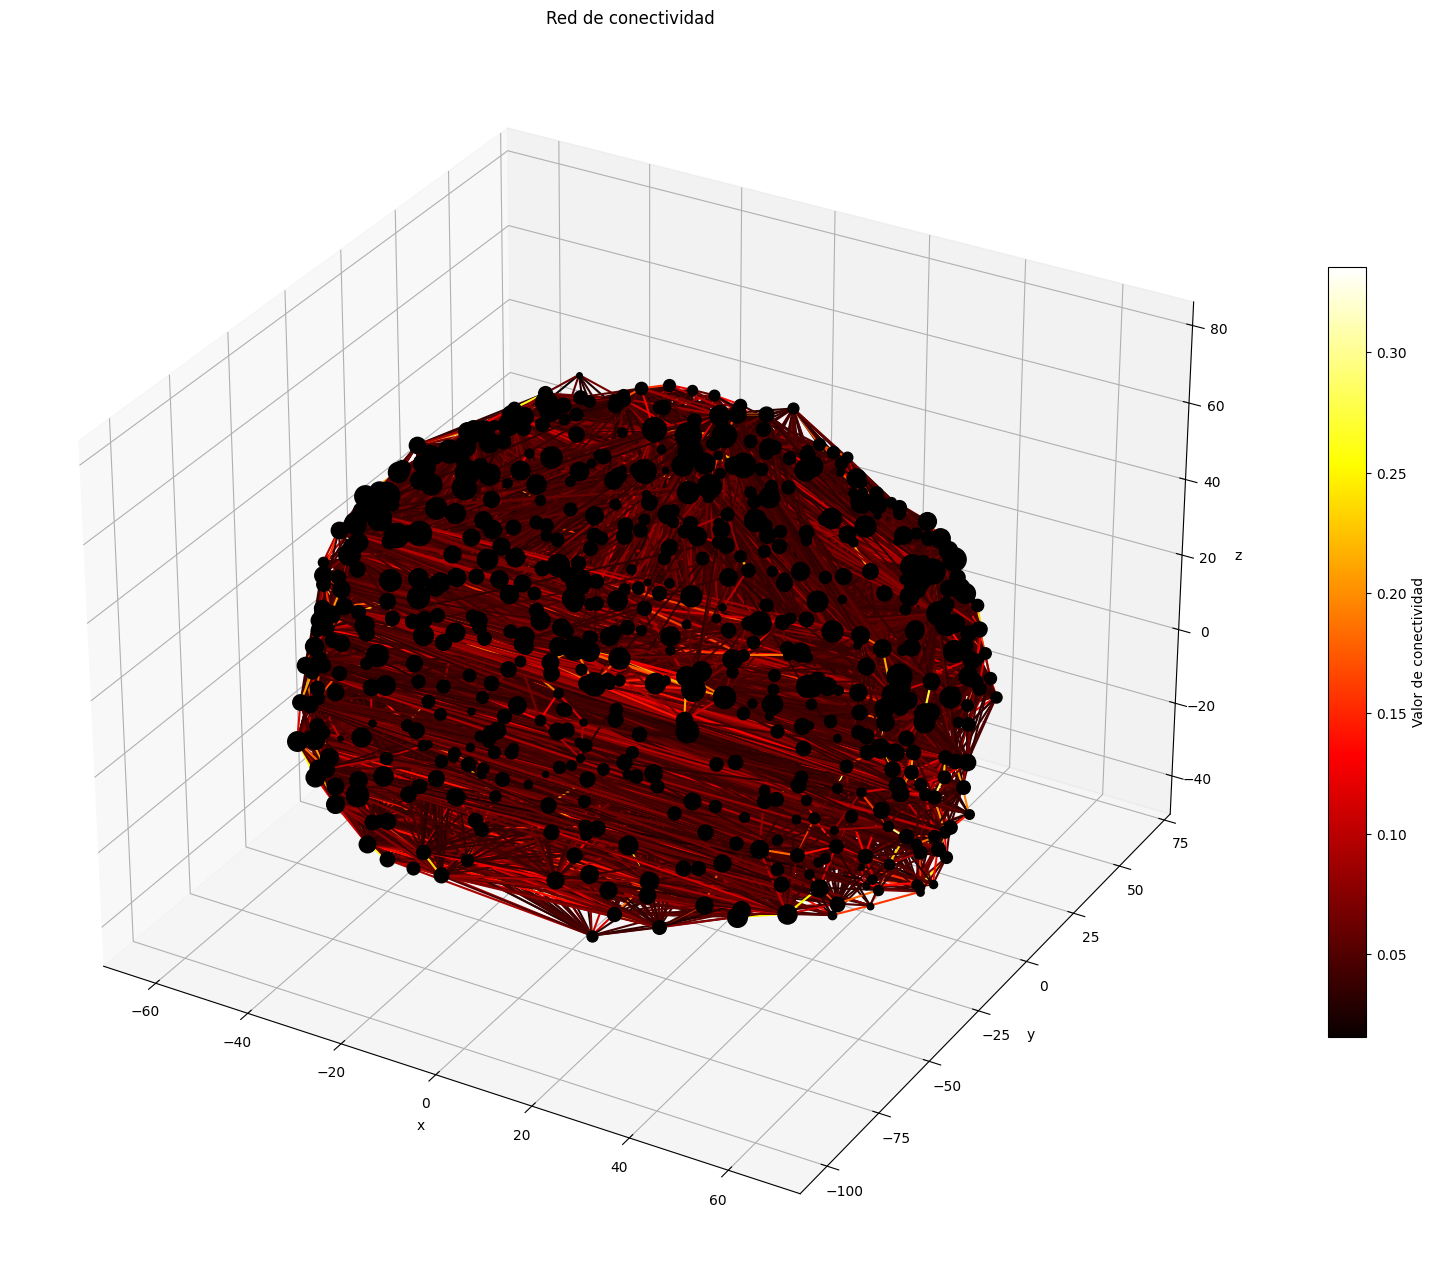

In [60]:


coord_df = pd.DataFrame(coord)

#Grafo 3D
GG = nx.from_pandas_adjacency(mat)

pos3D = {nodo: (coord_df.iloc[nodo, 0],
                coord_df.iloc[nodo, 1],
                 coord_df.iloc[nodo, 2],
               ) for nodo in coord_df.index}
tamaños = df_grado.Grado
tamaños = tamaños.values

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection = '3d') #el 111 indica la malla de subplots que va a crear, una de 111 solo será un subplot

i = 0
for nodo,(x,y,z) in pos3D.items():
    ax.scatter(x,y,z, s=tamaños[i]*2, c='black')
    i += 1

valores = mat.values[np.triu_indices_from(mat, k=1)]
valores = valores[valores > 0]
vmin = valores.min()
vmax = valores.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Escoger colormap
cmap = cm.hot

for i,j, data in GG.edges(data=True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    # Valor de la arista
    valor = mat.iloc[i, j]
    
    # Normalizar y asignar color
    valor_norm = norm(valor)
    color = cmap(valor_norm)
    
    # Dibujar arista con color
    ax.plot(x, y, z, c=color)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad')
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Valor de conectividad')

plt.show()

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

In [67]:
path = r"C:\Users\PC\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"
raw = mne.io.read_raw_edf(path, preload=True)
print(raw.info)

# Obtener los datos como numpy array
data, times = raw.get_data(return_times=True)
print(data.shape)  # (canales, muestras)

Extracting EDF parameters from C:\Users\PC\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: Surrogate>
>


C:\Users\PC\AppData\Local\Temp\ipykernel_12244\3036667205.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path, preload=True)


(23, 921600)


In [ ]:
mat = file_dict['Coactivation_matrix']
coord = file_dict['Coord']
mat = pd.DataFrame(data = mat)
G = nx.from_pandas_adjacency(mat)

####Mundo pequeño
#sw_coef = nx.sigma(G, niter=1, nrand=1)
#print(sigma)
#if sw_coef > 1:
    #print('La red tiene propiedades de mundo pequeño (Coeficiente >1)')
#Se comentó el calculo del coeficiente de mundo pequeño porque, para el tamaño del grafo, networkx tarda muchísimo en darlo. Se bajaron los valores de
#iter y rand a 1 (a diferencia de los default de 100 y 10) y aun así tarda demasiado.

####Comunidades
comm = nx.community.greedy_modularity_communities(G) #Algoritmo Clauset-Newman-Moore que busca 
#la división de nodos en comunidades que tenga más conexiones dentro que entre ellas.
print('El número de comunidades es: ', len(comm))

####Hubs (por grado)
degree_dict = dict(G.degree()) #Hacer diccionario con nodo:grado
hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)#Ordenar de mayor a menor
top_hubs = hubs[:10] # Mostrar los 10 nodos más conectados
print("Hubs (por grado):")
for node, deg in top_hubs:
    print(f"Nodo {node}: grado {deg}")

####Eficiencias
print(f'La eficiencia local del la red es:{nx.local_efficiency(G)}. \nLa eficiencia global del la red es:{nx.global_efficiency(G)}.')

####Grado
df_grado = pd.DataFrame(index = range(638), columns = ['Nodo', 'Grado'])
i = 0
for entrada in degree_dict:
    df_grado.iloc[i,0] = i
    df_grado.iloc[i,1] = degree_dict[i]
    i += 1
df_grado

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot